### To Do

In [127]:
"""
DONE: Data Cleaning / Handle missing values by dropping, imputing or flagging them.
DONE: Drop duplicates.
DONE: Drop unnecessary information (drop highly correlated features and drop features that do not help in the prediction).
DONE: Standardize formats and input ranges (covert all measures to the same format, i.e. celsius instead of Fahrenheit).
DONE: Change data to its correct type (make sure that numbers are of type int or float and not of type string, date types are of type date, etc).
DONE: Correct misspellings.
Remove outliers.
"""

'\nDONE: Data Cleaning / Handle missing values by dropping, imputing or flagging them.\nDONE: Drop duplicates.\nDONE: Drop unnecessary information (drop highly correlated features and drop features that do not help in the prediction).\nDONE: Standardize formats and input ranges (covert all measures to the same format, i.e. celsius instead of Fahrenheit).\nDONE: Change data to its correct type (make sure that numbers are of type int or float and not of type string, date types are of type date, etc).\nDONE: Correct misspellings.\nRemove outliers.\n'

### Data Cleaning

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [84]:
all_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_str.csv', sep=',')
all_wine_no_str = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_no_str.csv', sep=',')

white_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_str.csv', sep=',')
white_wine_no_str = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_str.csv', sep=',')

red_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\red_wine_str.csv', sep=',')
red_wine_no_str = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\red_wine_no_str.csv', sep=',')


In [86]:
all_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
type                    0
dtype: int64

In [85]:
all_wine.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,white
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,white


In [87]:
all_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### Create Dummies for String Columns

In [81]:
all_wine = pd.DataFrame(all_wine)

# Convert the 'quality_label' and 'type' columns into dummy variables
all_wine_with_dummies = pd.get_dummies(all_wine, columns=['quality_label', 'type'], drop_first=False, dtype=int)

# Display the first few rows of the updated DataFrame
all_wine_with_dummies.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label_high,quality_label_low,quality_label_medium,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0,1,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,1,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0,1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0,1,0,1


### Correlation Maps

Red Wine

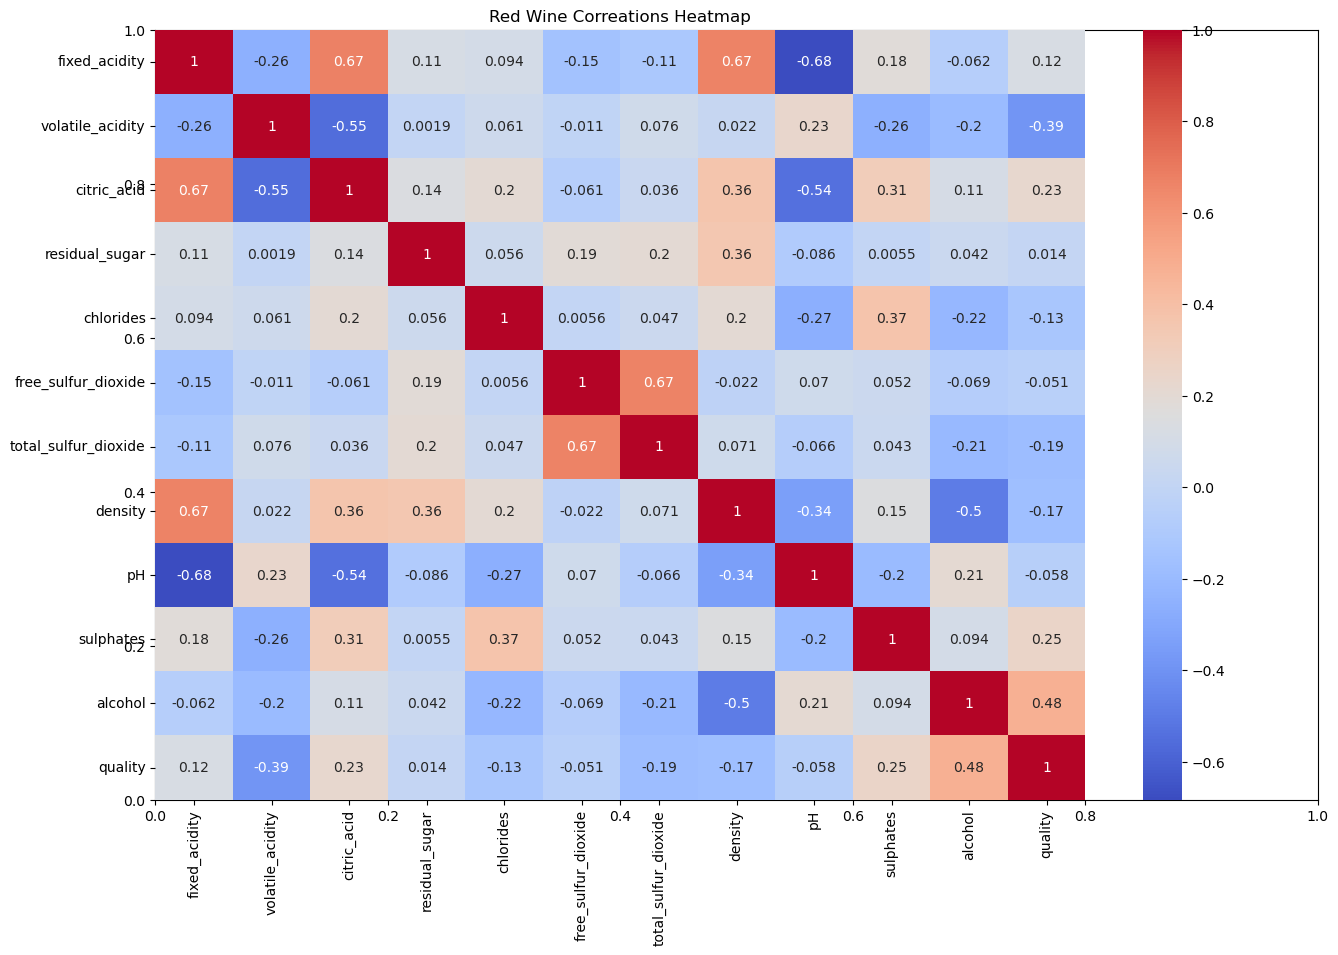

In [32]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Red Wine Correations Heatmap")
red_correlation = red_wine_no_str.corr()
sns.heatmap(red_correlation,cbar = True, annot = True, ax = ax, cmap = "coolwarm")
plt.show()

White Wine

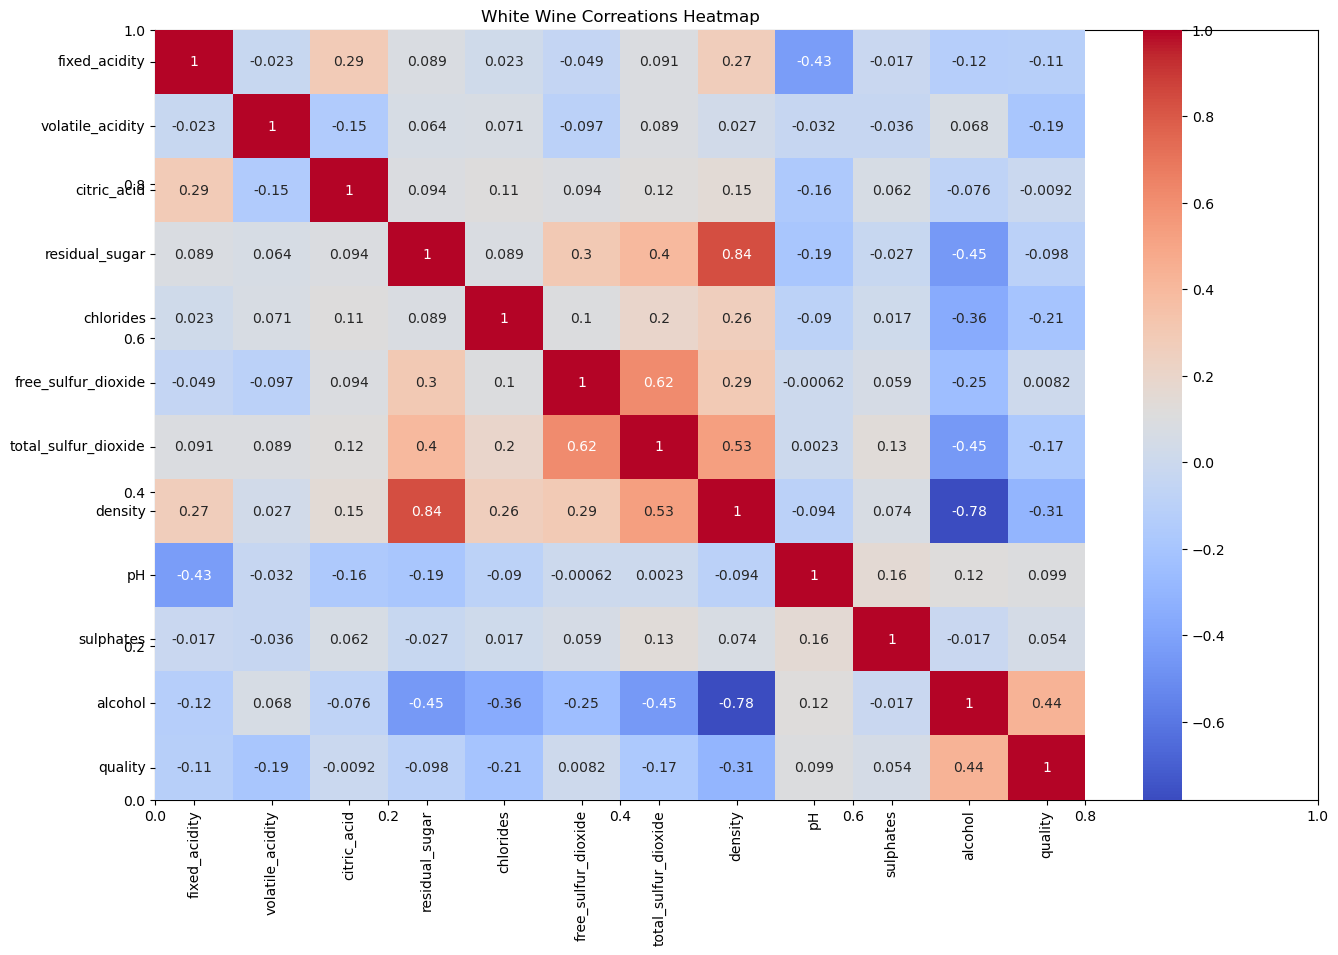

In [33]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("White Wine Correations Heatmap")
white_correlation = white_wine_no_str.corr()
sns.heatmap(white_correlation,cbar = True, annot = True, ax = ax, cmap = "coolwarm")
plt.show()

All Wine

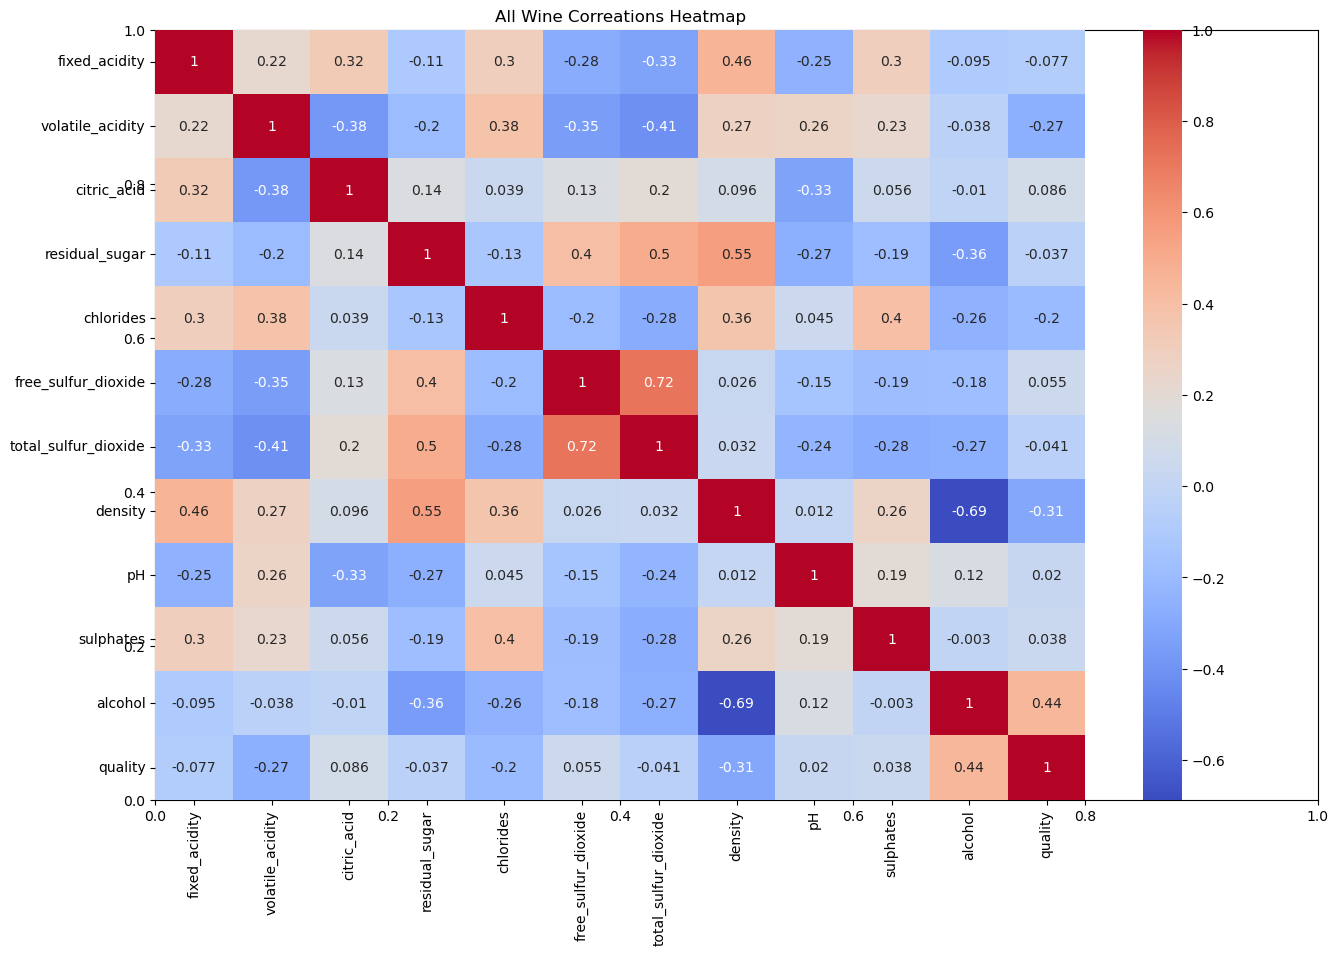

In [38]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("All Wine Correations Heatmap")
all_correlation = all_wine_no_str.corr()
sns.heatmap(all_correlation,cbar = True, annot = True, ax = ax, cmap = "coolwarm")
plt.show()

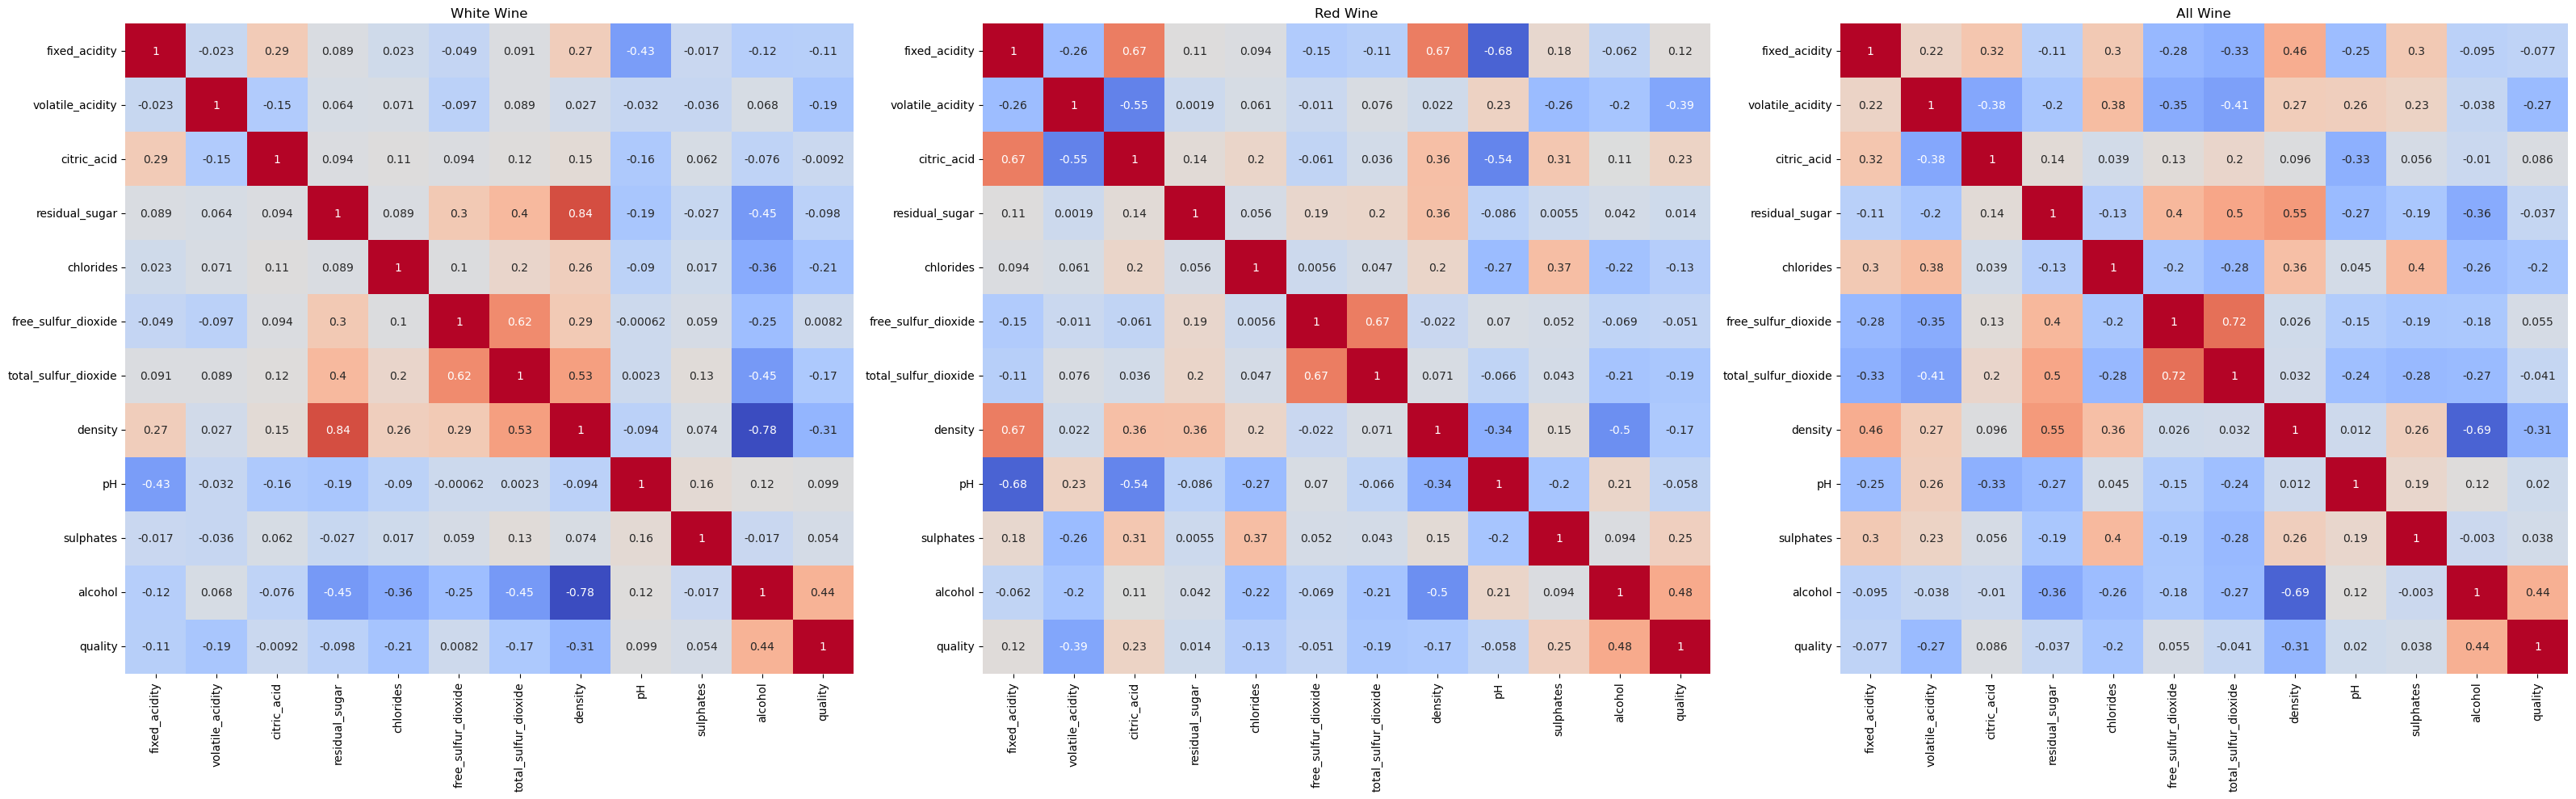

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming white_wine_no_str, red_wine_no_str, and all_wine_no_str are pandas DataFrames
white_correlation = white_wine_no_str.corr()
red_correlation = red_wine_no_str.corr()
all_correlation = all_wine_no_str.corr()

# Create a figure and a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(32, 10))

# Define a consistent vmin and vmax for all heatmaps to ensure the color range is consistent
vmin = min(white_correlation.min().min(), red_correlation.min().min(), all_correlation.min().min())
vmax = max(white_correlation.max().max(), red_correlation.max().max(), all_correlation.max().max())

# Plot each heatmap on a different subplot with the same vmin and vmax, and completely remove the color bar
sns.heatmap(white_correlation, ax=axes[0], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[0].set_title('White Wine')

sns.heatmap(red_correlation, ax=axes[1], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[1].set_title('Red Wine')

sns.heatmap(all_correlation, ax=axes[2], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
axes[2].set_title('All Wine')

# Adjust the layout to make sure all plots have the same size
plt.tight_layout(rect=[0, 0, 1, 1])  # No need to leave space for the color bar

# Display the heatmaps without any color bar
plt.show()


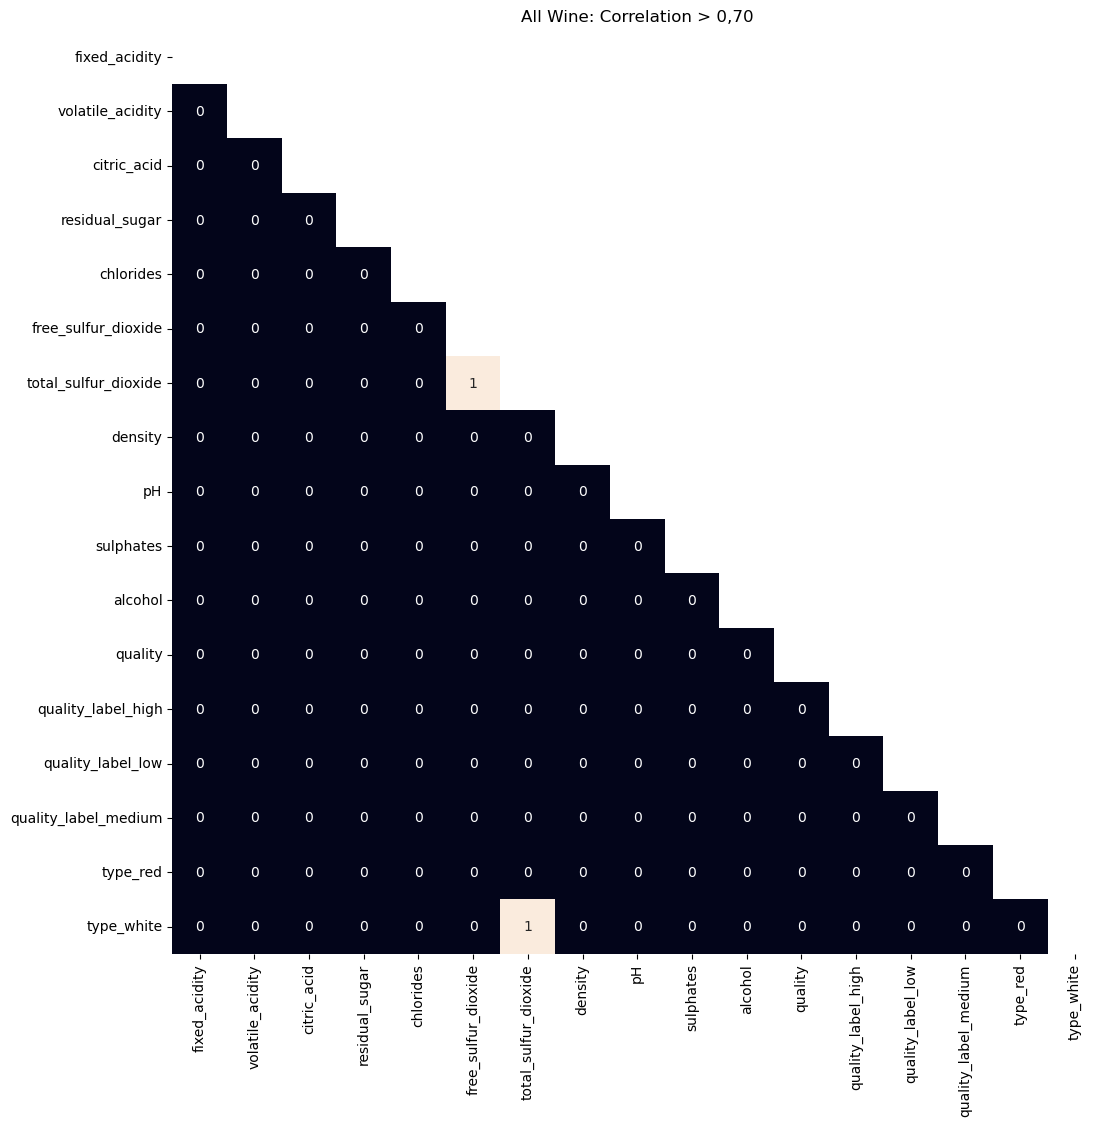

In [122]:
# Convert 'object' columns to numerical if they represent numbers
for col in all_wine_with_dummies.columns:
    if all_wine_with_dummies[col].dtype == 'object':
        try:
            all_wine_with_dummies[col] = pd.to_numeric(all_wine_with_dummies[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.7, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,70')
plt.show()

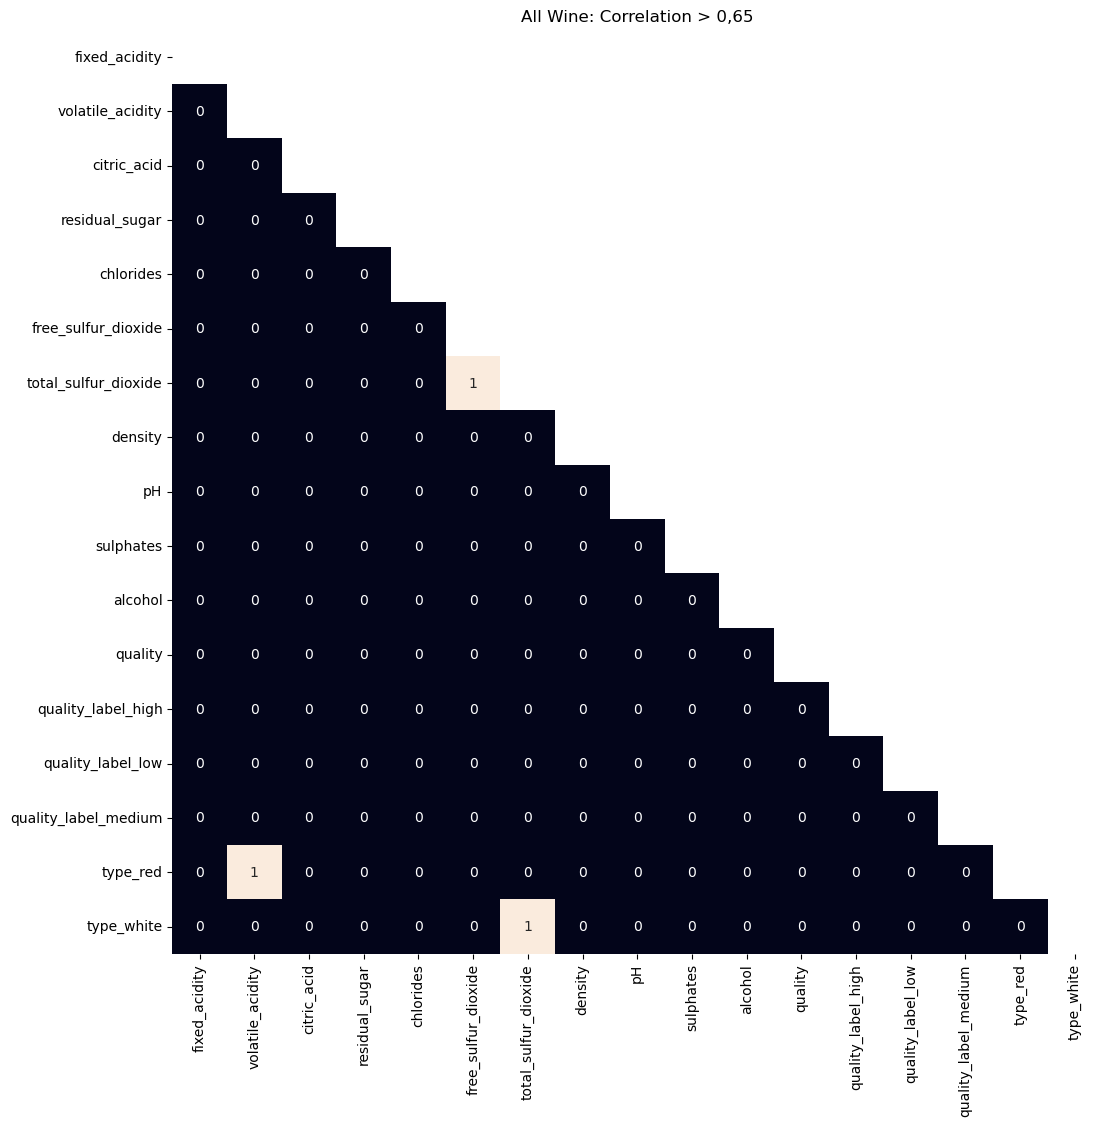

In [121]:
# Convert 'object' columns to numerical if they represent numbers
for col in all_wine_with_dummies.columns:
    if all_wine_with_dummies[col].dtype == 'object':
        try:
            all_wine_with_dummies[col] = pd.to_numeric(all_wine_with_dummies[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.65, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,65')
plt.show()

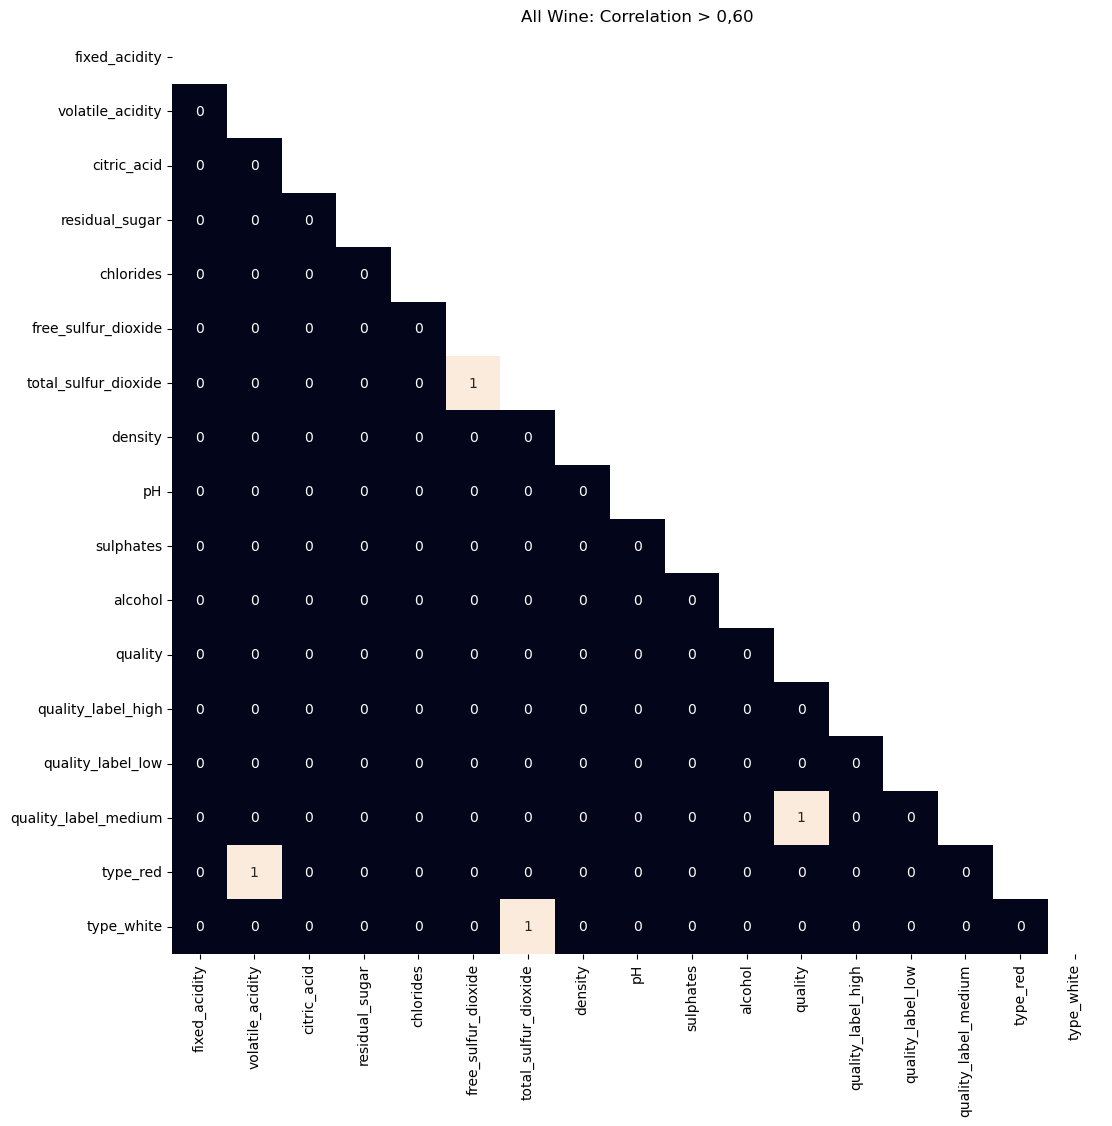

In [120]:
# Convert 'object' columns to numerical if they represent numbers
for col in all_wine_with_dummies.columns:
    if all_wine_with_dummies[col].dtype == 'object':
        try:
            all_wine_with_dummies[col] = pd.to_numeric(all_wine_with_dummies[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.60, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,60')
plt.show()

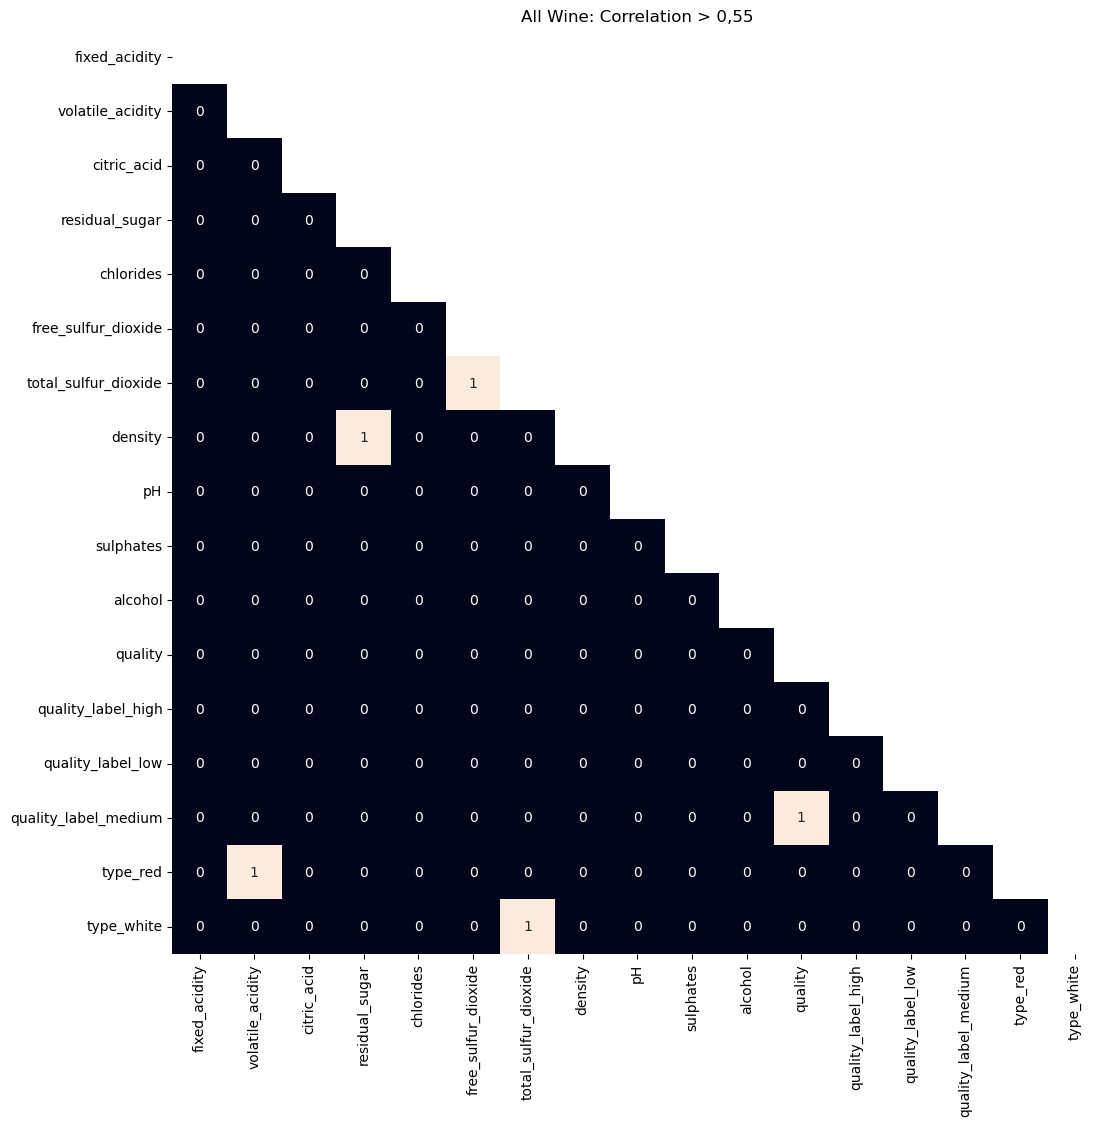

In [119]:
# Convert 'object' columns to numerical if they represent numbers
for col in all_wine_with_dummies.columns:
    if all_wine_with_dummies[col].dtype == 'object':
        try:
            all_wine_with_dummies[col] = pd.to_numeric(all_wine_with_dummies[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(all_wine_with_dummies.corr(), dtype=bool))
sns.heatmap(all_wine_with_dummies.corr() > 0.55, mask=mask, annot=True, cbar=False).set_title('All Wine: Correlation > 0,55')
plt.show()


### Dropping Highly Correlated Features

In [125]:
#Dropping 'total_sulfur_dioxide' due to correlation with 'free_sulfur_dioxide', keeping 'free...' due to slightly higher correlation with 'quality'
#Dropping 'density' die to correlation with 'alcohol', keeping 'alcohol' due to higher correlation with quality
all_wine_reduced = all_wine_with_dummies.drop(['total_sulfur_dioxide','density'], axis=1)
all_wine_reduced

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,pH,sulphates,alcohol,quality,quality_label_high,quality_label_low,quality_label_medium,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6,0,0,1,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6,0,0,1,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6,0,0,1,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6,0,0,1,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5,5,0,1,0,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,3.52,0.76,11.2,6,0,0,1,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0,6,0,0,1,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2,5,0,1,0,1,0


### Outlier Removal

### MinMax Scaler